# 5HT effects in feeding

> Fill in a module description here

In [ ]:
#| default_exp core

In [ ]:
#| hide
from nbdev.showdoc import *

In [ ]:
#| export
import svgutils
from svgutils.compose import *
import dabest
import matplotlib.pyplot as plt
plt.style.use('seaborn-colorblind')
import esploco.plotTools
from esploco.plotTools import setFont
setFont('Helvetica', 6)
plt.style.use('seaborn-colorblind')
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['svg.fonttype'] = 'none'
import pickle
import pandas as pd
import scipy
import numpy as np
import dabest
paperpath = '/Users/sangyuxu/Library/Mobile Documents/com~apple~CloudDocs/EspressoManu/'
picklepath = paperpath + 'DataforFigures/Behavior/Data/pickles/'
imagepath = paperpath + 'Figures20240202/'
figurepath = imagepath + '/Figure3/'
with open(picklepath+ 'W1118Dark_e.pickle', 'rb') as f:
            W1118Dark_e = pickle.load(f)
with open(picklepath + 'W1118Dark_ele.pickle', 'rb') as f:
            W1118Dark_ele = pickle.load(f)
with open(picklepath + 'TrhCsCh_ele.pickle', 'rb') as f:
            TrhCsCh_ele = pickle.load(f)
with open(picklepath + 'TrhACR1_ele.pickle', 'rb') as f:
            TrhACR1_ele = pickle.load(f)    
with open(picklepath + 'R50CsCh_ele.pickle', 'rb') as f:
            R50CsCh_ele = pickle.load(f)
with open(picklepath + 'R50ACR1_ele.pickle', 'rb') as f:
            R50ACR1_ele = pickle.load(f) 


TrhCsCh = pd.read_csv(picklepath + 'TrhCsCh_ele.csv').sort_values(by = 'Light')
R50CsCh = pd.read_csv(picklepath + 'R50CsCh_ele.csv').sort_values(by = 'Light')
TrhACR = pd.read_csv(picklepath + 'TrhACRRound2_ele.csv').sort_values(by = 'Light')
R50ACR = pd.read_csv(picklepath + 'R50ACRRound2_ele.csv').sort_values(by = 'Light')
for df in [TrhCsCh, R50CsCh, TrhACR, R50ACR]:
    df['Volume'] = df['Volume']*1000
    df['Meal Size'] = df['Meal Size']*1000
    df['Feed Speed'] = df['Feed Speed']*1000
cm = W1118Dark_ele.cm

/var/folders/jq/z93pq6zd39s_vky_yyjtcxp00000gn/T/ipykernel_76070/4188403375.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-colorblind')
/var/folders/jq/z93pq6zd39s_vky_yyjtcxp00000gn/T/ipykernel_76070/4188403375.py:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-colorblind')


In [ ]:
TrhCsCh['GenoReduced'] = TrhCsCh.Genotype.replace({'trh-gal4>uas-chrimson':'Trh>CsCh', 'w1118; uas-chrimson':'CsCh/w', 'w1118; trh-gal4':'Trh/w'}).astype('category').cat.set_categories(['CsCh/w', 'Trh/w', 'Trh>CsCh'], ordered=True)
R50CsCh['GenoReduced'] = R50CsCh.Genotype.replace({'r50h05-gal4>uas-chrimson':'R50H05>CsCh', 'w1118;uas-cschrimson':'CsCh/w', 'w1118; r50h05-gal4':'R50H05/w'}).astype('category').cat.set_categories(['CsCh/w', 'R50H05/w', 'R50H05>CsCh'], ordered=True)
TrhACR['GenoReduced'] = TrhACR.Genotype.replace({'trh-gal4>uas-acr1':'Trh>ACR1', 'w1118; uas-acr1':'ACR1/w', 'w1118; trh-gal4':'Trh/w'}).astype('category').cat.set_categories(['ACR1/w', 'Trh/w', 'Trh>ACR1'], ordered=True)
R50ACR['GenoReduced'] = R50ACR.Genotype.replace({'r50h05-gal4>uas-acr1':'R50H05>ACR1', 'w1118; uas-acr1':'ACR1/w', 'w1118; r50h05-gal4':'R50H05/w'}).astype('category').cat.set_categories(['ACR1/w', 'R50H05/w', 'R50H05>ACR1'], ordered=True)

trhcschpalette = {'Trh>CsCh':'orangered', 'CsCh/w':'gray', 'Trh/w':'k'}
r50cschpalette = {'R50H05>CsCh':'orangered', 'CsCh/w':'gray', 'R50H05/w':'k'}
trhacrpalette = {'Trh>ACR1':'seagreen', 'ACR1/w':'gray', 'Trh/w':'k'}
r50acrpalette = {'R50H05>ACR1':'seagreen', 'ACR1/w':'gray', 'R50H05/w':'k'}



In [ ]:

cschpalette = {'Ctrl-Red Light On':'k', 'Ctrl-Red Light Off':'lightgray', 'Test-Red Light On':'orangered', 'Test-Red Light Off':'mistyrose' }
acrpalette = {'Ctrl-Green Light On':'k', 'Ctrl-Green Light Off':'lightgray', 'Test-Green Light On':'seagreen', 'Test-Green Light Off':'paleturquoise' }


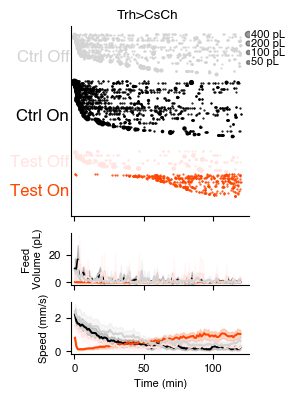

In [ ]:
setFont('Helvetica', 8)
a, b, c = TrhCsCh_ele.plotStacked(colorBy = ['Status','Temperature'], customPalette=cschpalette, dotbase=1, dotratio=10, figsize=(3, 4))
a.suptitle('Trh>CsCh')
a.savefig(figurepath+'TrhCsCh_raster.svg')

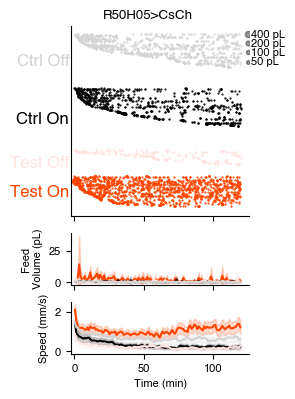

In [ ]:

setFont('Helvetica', 8)

a, b, c = R50CsCh_ele.plotStacked(colorBy = ['Status','Temperature'], customPalette=cschpalette, dotbase=1, dotratio=10, figsize=(3, 4))
a.suptitle('R50H05>CsCh')
a.savefig(figurepath+'R50CsCh_raster.svg')

<matplotlib.legend.Legend>

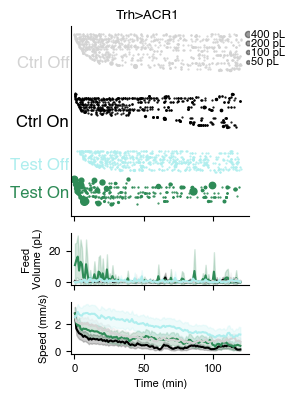

In [ ]:
setFont('Helvetica', 8)
a, b, c = TrhACR1_ele.plotStacked(colorBy = ['Status','Temperature'], customPalette=acrpalette, dotbase=1, dotratio=10, figsize=(3, 4))
a.suptitle('Trh>ACR1')
a.savefig(figurepath+'TrhACR1_raster.svg')

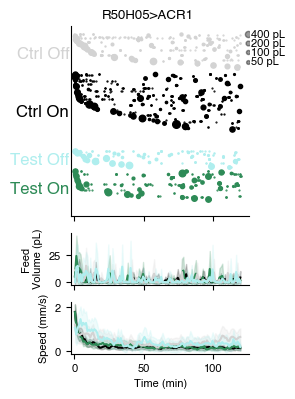

In [ ]:

setFont('Helvetica', 8)
a, b, c = R50ACR1_ele.plotStacked(colorBy = ['Status','Temperature'], customPalette=acrpalette, dotbase=1, dotratio=10, figsize=(3, 4))
a.suptitle('R50H05>ACR1')
a.savefig(figurepath+'R50ACR1_raster.svg')

/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 8.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 33.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 21.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 28.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Applications/ana

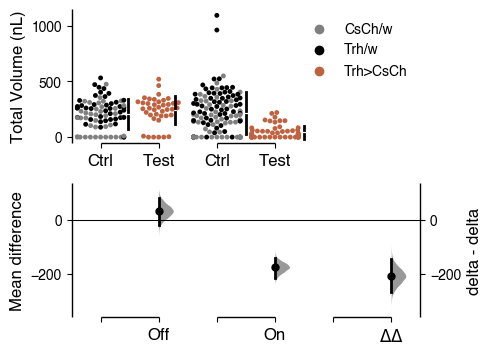

In [ ]:
trhCsChV = dabest.load(TrhCsCh, x = ['Status', 'GenoReduced'], y =  'Volume', delta2 = True, experiment = 'Light', x1_level=['Ctrl', 'Test'])
ftrhCsChV = trhCsChV.mean_diff.plot(raw_marker_size=3.5, es_marker_size= 5, custom_palette= trhcschpalette, fig_size=(4.5, 4), swarm_label='Total Volume (nL)')
ftrhCsChV.axes[0].set_xticklabels(['Ctrl', 'Test', 'Ctrl', 'Test'])
ftrhCsChV.axes[0].legend( frameon=False,loc='best', fontsize= 10, markerscale = 1, )

ftrhCsChV.axes[1].set_xticklabels(['', 'Off', '', 'On','', r'$\Delta\Delta$'])
ftrhCsChV.savefig(figurepath+'TrhCsCh_Vcontrast.svg')

In [ ]:
R50CsCh.GenoReduced

124    R50H05>CsCh
123            NaN
125            NaN
126            NaN
127    R50H05>CsCh
          ...     
158    R50H05>CsCh
157            NaN
156    R50H05>CsCh
177    R50H05>CsCh
389            NaN
Name: GenoReduced, Length: 390, dtype: category
Categories (3, object): ['UAS' < 'Gal4' < 'R50H05>CsCh']

/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 55.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 30.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 57.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 72.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Applications/an

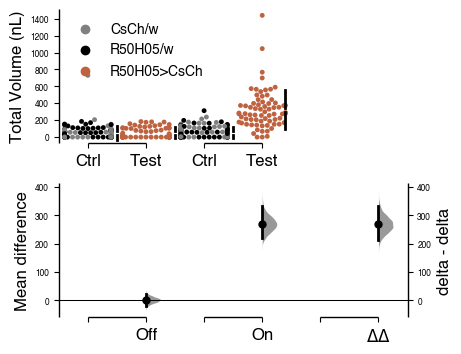

In [ ]:
r50CsChV = dabest.load(R50CsCh, x = ['Status', 'GenoReduced'], y =  'Volume', delta2 = True, experiment = 'Light', x1_level=['Ctrl', 'Test'])
fr50CsChV = r50CsChV.mean_diff.plot(raw_marker_size=3.5, es_marker_size= 5, custom_palette= r50cschpalette, fig_size=(4.5, 4), swarm_label='Total Volume (nL)')
fr50CsChV.axes[0].set_xticklabels(['Ctrl', 'Test', 'Ctrl', 'Test'])
fr50CsChV.axes[0].legend( frameon=False,loc='best', fontsize= 10, markerscale = 1, )
fr50CsChV.axes[1].set_xticklabels(['', 'Off', '', 'On','', r'$\Delta\Delta$'])
fr50CsChV.savefig(figurepath+'R50CsCh_Vcontrast.svg')

/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 22.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 33.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 46.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 15.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Applications/an

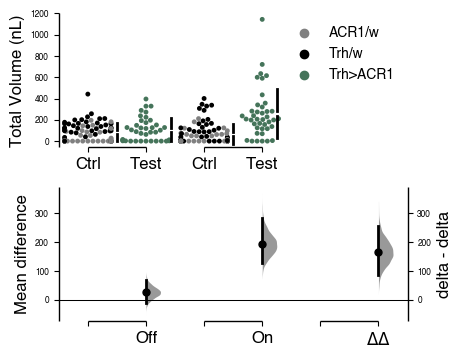

In [ ]:
rtrhACRV = dabest.load(TrhACR, x = ['Status', 'GenoReduced'], y =  'Volume', delta2 = True, experiment = 'Light', x1_level=['Ctrl', 'Test'])
ftrhACRV = rtrhACRV.mean_diff.plot(raw_marker_size=3.5, es_marker_size= 5, custom_palette= trhacrpalette, fig_size=(4.5, 4), swarm_label='Total Volume (nL)')
ftrhACRV.axes[0].set_xticklabels(['Ctrl', 'Test', 'Ctrl', 'Test'])
ftrhACRV.axes[0].legend( frameon=False,loc='best', fontsize= 10, markerscale = 1, )
ftrhACRV.axes[1].set_xticklabels(['', 'Off', '', 'On','', r'$\Delta\Delta$'])
ftrhACRV.savefig(figurepath+'TrhACR1_Vcontrast.svg')

/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 7.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 18.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 18.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 18.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Applications/ana

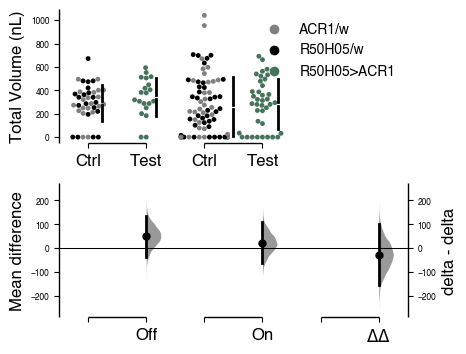

In [ ]:
r50ACRV = dabest.load(R50ACR, x = ['Status', 'GenoReduced'], y =  'Volume', delta2 = True, experiment = 'Light', x1_level=['Ctrl', 'Test'])
fr50ACRV = r50ACRV.mean_diff.plot(raw_marker_size=3.5, es_marker_size= 5, custom_palette= r50acrpalette, fig_size=(4.5, 4), swarm_label='Total Volume (nL)')
fr50ACRV.axes[0].set_xticklabels(['Ctrl', 'Test', 'Ctrl', 'Test'])
fr50ACRV.axes[0].legend(frameon=False,loc='best', fontsize= 10, markerscale = 1, )
fr50ACRV.axes[1].set_xticklabels(['', 'Off', '', 'On','', r'$\Delta\Delta$'])
fr50ACRV.savefig(figurepath+'R50ACR1_Vcontrast.svg')

In [ ]:
TrhCsCh.columns

Index(['Light', 'Genotype', 'Status', 'ID', 'Starvation', 'Meal Size',
       'Feed Speed', 'Prefeed Speed', 'Duringfeed Speed', 'Postfeed Speed',
       'Meal Duration', 'Volume', 'Count', 'Duration', 'Latency',
       'Duringfeed Speed Ratio', 'Perifeed Speed Ratio', 'Speed', 'Height',
       'Food Port Occupancy', 'Ctrl Port Occupancy', 'Falls', 'date',
       'GenoReduced'],
      dtype='object')

metric        Perifeed Speed Ratio
y             Perifeed Speed Ratio
swarmLabel    Perifeed Speed Ratio
yUnit                             
Name: 6, dtype: object


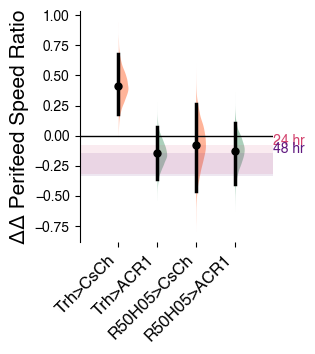

In [ ]:
palettes = [redcschpalette, redacrpalette, redcschpalette, redacrpalette]
wtBaseline = pd.read_csv('/Users/sangyuxu/Library/Mobile Documents/com~apple~CloudDocs/EspressoManu/Figures20240202/Figure1/wtBaseline.csv')
def plotForestDD(contrasts, metric, palettes = palettes, exptNames = None, labelX = True, imagepath = None):
    def pickouttestcolor(palette):
        s = [i for i in palette.keys() if 'w1118' not in i]    
        return palette[s[0]]
    if palettes:
        testColors = [pickouttestcolor(p) for p in palettes]
    DDbootstraps = [c.mean_diff.delta_delta.bootstraps_delta_delta for c in contrasts]
    setFont('Helvetica', 10)
    fForest = plt.figure(figsize = [2.5, 3])
    ax = plt.subplot(111)
    default_violinplot_kwargs = {'widths':0.5, 'vert':True,
                                   'showextrema':False, 'showmedians':False}
    v = ax.violinplot(DDbootstraps, **default_violinplot_kwargs)
    dabest.plot_tools.halfviolin(v, alpha = 0.4)
    ax.plot([0, len(contrasts)+1], [0, 0], 'k', linewidth = 1)
    ticks = list(range(1, len(contrasts)+1))
    for i in ticks:
        ax.plot(i, contrasts[i-1].mean_diff.delta_delta.difference, 'k.', markersize = 10)
        ax.plot([i, i], [contrasts[i-1].mean_diff.delta_delta.bca_low, contrasts[i-1].mean_diff.delta_delta.bca_high], 'k', linewidth = 2.5)

    ax.set_xticks(ticks)
    ax.set_xlim([0, len(contrasts)+1])
#     ax.set_xticklabels(mainDataPathList[1::],
#                       rotation = 45, ha = 'right', fontsize = 20)
    ax.set_ylabel('ΔΔ ' + metric.swarmLabel, fontsize = 15)
#     ax.set_title(metric.metric, fontsize = 20)
    # ax.set_ylim(-0.5, 0.2)
    ax.spines['bottom'].set_color(None)
    ax.spines['top'].set_color(None)
    ax.spines['right'].set_color(None)
    # ax.spines['left'].set_color(None)

    for i in range(0, len(contrasts)):
        if palettes:
                ax.collections[i].set_fc(testColors[i])
        else:
            if contrasts[i].mean_diff.delta_delta.bca_low>0:
                ax.collections[i].set_fc('g')
            if contrasts[i].mean_diff.delta_delta.bca_high<0:
                ax.collections[i].set_fc('r')
    # ax.set_xticks(list(range(i+1)))
    if exptNames:
        if labelX:
            ax.set_xticklabels(exptNames, 
                               rotation = 45, 
                               ha = 'right',
                               fontsize = 12)
        else:
            ax.set_xticklabels(['']* (i+1))
    
    return fForest

exptNames = ['Starved      \nDriver      \nResponder', '24 Hr\nTrh\nCsChR', '0 Hr\nTrh\nGtACR1', '0 Hr\nR50H05\nCsChR', '24 Hr\nR50H05\nGtACR1']
feedMetricMap = {'metric': ['Volume', 'Count', 'Meal Size', 'Duration', 'Latency', 'Speed', 'Perifeed Speed Ratio'], 
             'y' : ['Volume', 'Count', 'Meal Size', 'Duration', 'Latency', 'Speed', 'Perifeed Speed Ratio'], 
             'swarmLabel': ['Volume (nL)', 'Count', 'MealSize (nL)', 'Duration (min)', 'Latency (min)', 'Speed (mm/s)', 'Perifeed Speed Ratio'],
                'yUnit': ['nL', '', 'nL', 'min', 'min', 'mm/s',  '']}
feedMetricMapDf = pd.DataFrame(data = feedMetricMap)


for i in range(6, 7):
    
    entry = feedMetricMapDf.loc[i]
    print(entry)
#     setFont('Inter',9)
    cTrhCsCh = dabest.load(TrhCsCh, x = ['Status', 'GenoReduced'], experiment = 'Light', y = entry.metric, x1_level=['Ctrl', 'Test'], delta2 = True)
    cTrhACR  = dabest.load(TrhACR, x = ['Status', 'GenoReduced'], experiment = 'Light', y = entry.metric, x1_level=['Ctrl', 'Test'], delta2 = True)
    cR50CsCh = dabest.load(R50CsCh, x = ['Status', 'GenoReduced'], experiment = 'Light', y = entry.metric, x1_level=['Ctrl', 'Test'], delta2 = True)
    cR50ACR  = dabest.load(R50ACR, x = ['Status', 'GenoReduced'],  experiment = 'Light', y = entry.metric, x1_level=['Ctrl', 'Test'], delta2 = True)
    if i ==4:
        labelX = True
    else:
        labelX = True
    contrasts = [cTrhCsCh, cTrhACR, cR50CsCh, cR50ACR]
    Forest = plotForestDD(contrasts, entry, exptNames = ['Trh>CsCh', 'Trh>ACR1', 'R50H05>CsCh', 'R50H05>ACR1'], labelX = labelX)
    wtB = wtBaseline.loc[wtBaseline.Metric == entry.metric]
    x = np.arange(0.0, 5, 0.01)
    l24 = wtB.L24
    h24 = wtB.H24
    l48 = wtB.L48
    h48 = wtB.H48
    Forest.axes[0].fill_between(x, l24, h24, alpha=0.1, facecolor = sns.color_palette("magma")[3],zorder=1)
    Forest.axes[0].fill_between(x, l48, h48, alpha=0.1, facecolor = sns.color_palette("magma")[1],zorder=1)
    Forest.axes[0].text(5, h24, '24 hr', color = sns.color_palette("magma")[3])
    if entry.metric == 'Speed':
        Forest.axes[0].text(5, l48, '48 hr', color = sns.color_palette("magma")[1])
    else:
        Forest.axes[0].text(5, h48, '48 hr', color = sns.color_palette("magma")[1])

    Forest.savefig(figurepath+entry.metric + '.svg')




In [ ]:
contrasts[0].mean_diff.delta_delta

'`delta2` is False; delta-delta is therefore not calculated.'

In [ ]:
## from svgutils.compose import *

Figure("24cm", "30cm", 
    Panel(SVG(figurepath + 'Trh.svg').scale(0.04),
    Text("A", 0, -0.1, size=0.3, font = 'Helvetica', weight='bold') ).move(1, .5),
    Panel(SVG(figurepath + 'TrhCsCh_Raster.svg').scale(0.02),
    Text("B", 0.2, -0.1, size=0.3, font = 'Helvetica', weight='bold') ).move(7, .5),
    Panel(SVG(figurepath + 'TrhACR1_raster.svg').scale(0.02),
    Text("C", 0.2, -0.1, size=0.3, font = 'Helvetica', weight='bold') ).move(11.5, .5),
    Panel(SVG(figurepath + 'R50.svg').scale(0.04),
    Text("D", 0, -0.1, size=0.3, font = 'Helvetica', weight='bold') ).move(1, 6.5),
    Panel(SVG(figurepath + 'R50CsCh_raster.svg').scale(0.02),
    Text("E", 0.2, -0.1, size=0.3, font = 'Helvetica', weight='bold') ).move(7, 6.5),
    Panel(SVG(figurepath + 'R50ACR1_raster.svg').scale(0.02),
    Text("F", 0.2, -0.1, size=0.3, font = 'Helvetica', weight='bold') ).move(11.5, 6.5),
    Panel(SVG(figurepath + 'TrhCsCh_Vcontrast.svg').scale(0.01),
    Text("G", 0, 0.2, size=0.3, font = 'Helvetica', weight='bold') ).move(1, 12),
    Panel(SVG(figurepath + 'TrhACR1_Vcontrast.svg').scale(0.01),
    Text("H", 0, 0.2, size=0.3, font = 'Helvetica', weight='bold') ).move(4.5, 12),
    Panel(SVG(figurepath + 'R50CsCh_Vcontrast.svg').scale(0.01),
    Text("I", 0.2, 0.2, size=0.3, font = 'Helvetica', weight='bold') ).move(8, 12),
    Panel(SVG(figurepath + 'R50ACR1_Vcontrast.svg').scale(0.01),
    Text("J", 0.2, 0.2, size=0.3, font = 'Helvetica', weight='bold') ).move(11.5, 12),
    Panel(SVG(figurepath + 'Volume.svg').scale(0.01),
    Text("K", 0, 0.2, size=0.3, font = 'Helvetica', weight='bold') ).move(1, 15),
    Panel(SVG(figurepath + 'Duration.svg').scale(0.01),
    Text("L", 0, 0.2, size=0.3, font = 'Helvetica', weight='bold') ).move(3.5, 15),
    Panel(SVG(figurepath + 'Meal Size.svg').scale(0.01),
    Text("M", 0.2, 0.2, size=0.3, font = 'Helvetica', weight='bold') ).move(6, 15),
    Panel(SVG(figurepath + 'Count.svg').scale(0.01),
    Text("N", 0.2, 0.2, size=0.3, font = 'Helvetica', weight='bold') ).move(8.5, 15),
    Panel(SVG(figurepath + 'Latency.svg').scale(0.01),
    Text("O", 0.2, 0.2, size=0.3, font = 'Helvetica', weight='bold') ).move(11, 15),
    Panel(SVG(figurepath + 'Speed.svg').scale(0.01),
    Text("P", 0.2, 0.2, size=0.3, font = 'Helvetica', weight='bold') ).move(13.5, 15),
    ).save(figurepath+"/Figure3.svg")



In [ ]:
## from svgutils.compose import *

Figure("24cm", "30cm", 
    Panel(SVG(figurepath + 'Trh.svg').scale(0.04),
    Text("", 0, -0.1, size=0.3, font = 'Helvetica', weight='bold') ).move(1, .5),
    Panel(SVG(figurepath + 'TrhCsCh_Raster.svg').scale(0.02),
    Text("", 0.2, -0.1, size=0.3, font = 'Helvetica', weight='bold') ).move(7, .5),
    Panel(SVG(figurepath + 'TrhACR1_raster.svg').scale(0.02),
    Text("", 0.2, -0.1, size=0.3, font = 'Helvetica', weight='bold') ).move(11.5, .5),
    Panel(SVG(figurepath + 'R50.svg').scale(0.04),
    Text("", 0, -0.1, size=0.3, font = 'Helvetica', weight='bold') ).move(1, 6.5),
    Panel(SVG(figurepath + 'R50CsCh_raster.svg').scale(0.02),
    Text("", 0.2, -0.1, size=0.3, font = 'Helvetica', weight='bold') ).move(7, 6.5),
    Panel(SVG(figurepath + 'R50ACR1_raster.svg').scale(0.02),
    Text("", 0.2, -0.1, size=0.3, font = 'Helvetica', weight='bold') ).move(11.5, 6.5),
    Panel(SVG(figurepath + 'TrhCsCh_Vcontrast.svg').scale(0.01),
    Text("", 0, 0.2, size=0.3, font = 'Helvetica', weight='bold') ).move(1, 12),
    Panel(SVG(figurepath + 'TrhACR1_Vcontrast.svg').scale(0.01),
    Text("", 0, 0.2, size=0.3, font = 'Helvetica', weight='bold') ).move(4.5, 12),
    Panel(SVG(figurepath + 'R50CsCh_Vcontrast.svg').scale(0.01),
    Text("", 0.2, 0.2, size=0.3, font = 'Helvetica', weight='bold') ).move(8, 12),
    Panel(SVG(figurepath + 'R50ACR1_Vcontrast.svg').scale(0.01),
    Text("", 0.2, 0.2, size=0.3, font = 'Helvetica', weight='bold') ).move(11.5, 12),
    Panel(SVG(figurepath + 'Volume.svg').scale(0.01),
    Text("", 0, 0.2, size=0.3, font = 'Helvetica', weight='bold') ).move(1, 15),
    Panel(SVG(figurepath + 'Duration.svg').scale(0.01),
    Text("", 0, 0.2, size=0.3, font = 'Helvetica', weight='bold') ).move(3.5, 15),
    Panel(SVG(figurepath + 'Meal Size.svg').scale(0.01),
    Text("", 0.2, 0.2, size=0.3, font = 'Helvetica', weight='bold') ).move(6, 15),
    Panel(SVG(figurepath + 'Count.svg').scale(0.01),
    Text("", 0.2, 0.2, size=0.3, font = 'Helvetica', weight='bold') ).move(8.5, 15),
    Panel(SVG(figurepath + 'Latency.svg').scale(0.01),
    Text("", 0.2, 0.2, size=0.3, font = 'Helvetica', weight='bold') ).move(11, 15),
    Panel(SVG(figurepath + 'Speed.svg').scale(0.01),
    Text("", 0.2, 0.2, size=0.3, font = 'Helvetica', weight='bold') ).move(13.5, 15),
    ).save(figurepath+"/Figure3_nolabel.svg")



# 